# Instgram reach analysis

# Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

# cheak for null values

In [3]:
print(data.isnull().sum())

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [6]:
data.dropna

<bound method DataFrame.dropna of      Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Sh

# Analyzing Instagram Reach
first have a look at the distribution of impressions I have received from home

C:\Users\Mohamed Adel\AppData\Local\Temp\ipykernel_14580\4127021947.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


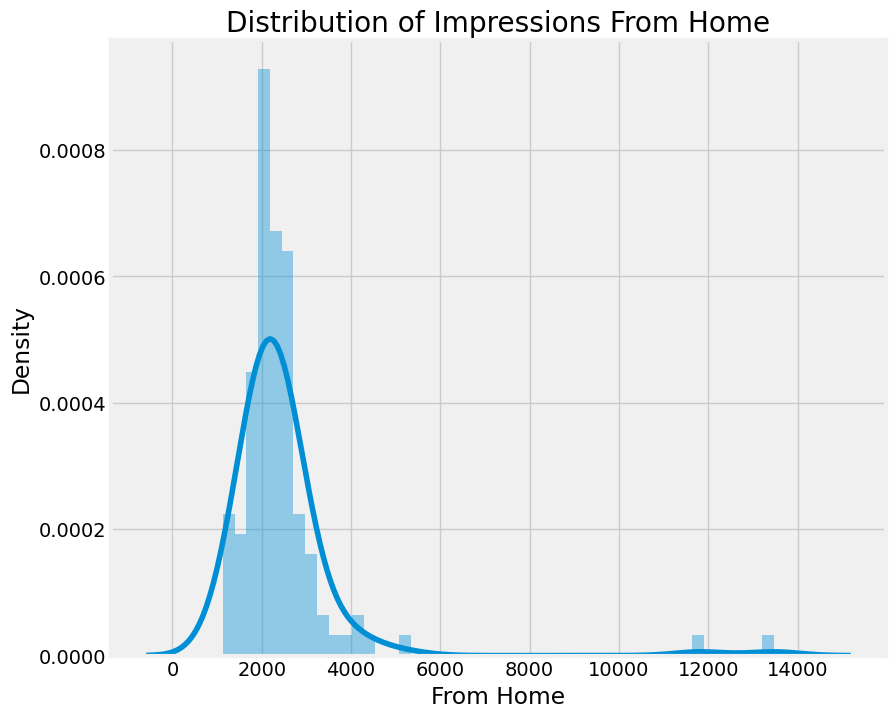

In [7]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily.

# let’s have a look at the distribution of the impressions I received from hashtags

C:\Users\Mohamed Adel\AppData\Local\Temp\ipykernel_14580\671336047.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


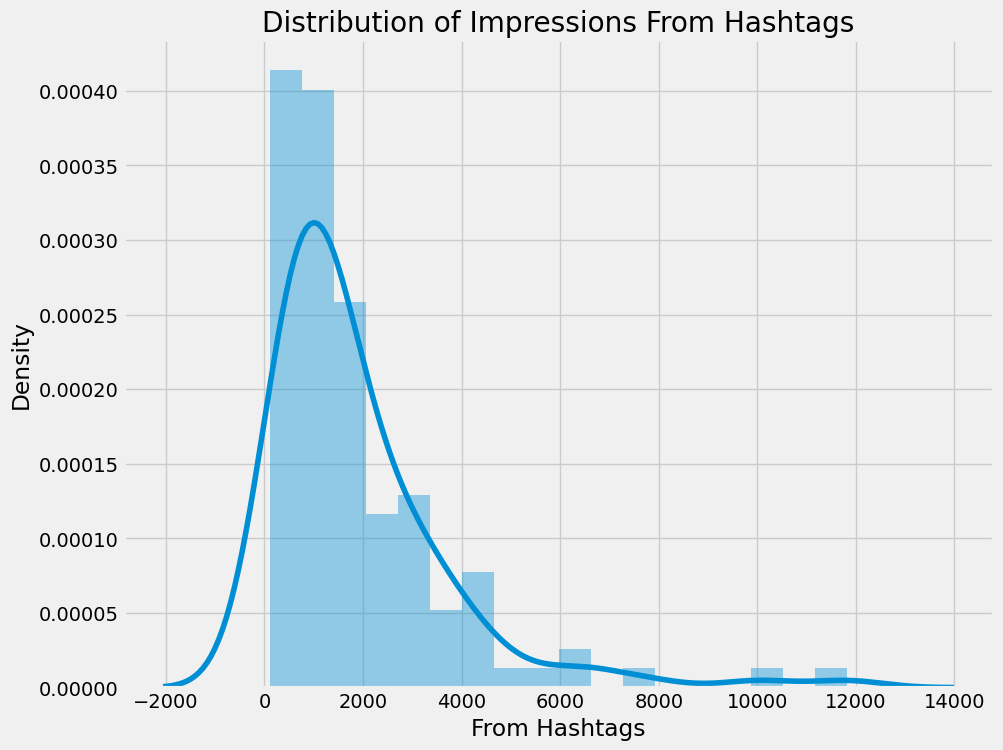

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

 Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.

# let’s have a look at the distribution of impressions I have received from the explore section of Instagram

C:\Users\Mohamed Adel\AppData\Local\Temp\ipykernel_14580\2610232579.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


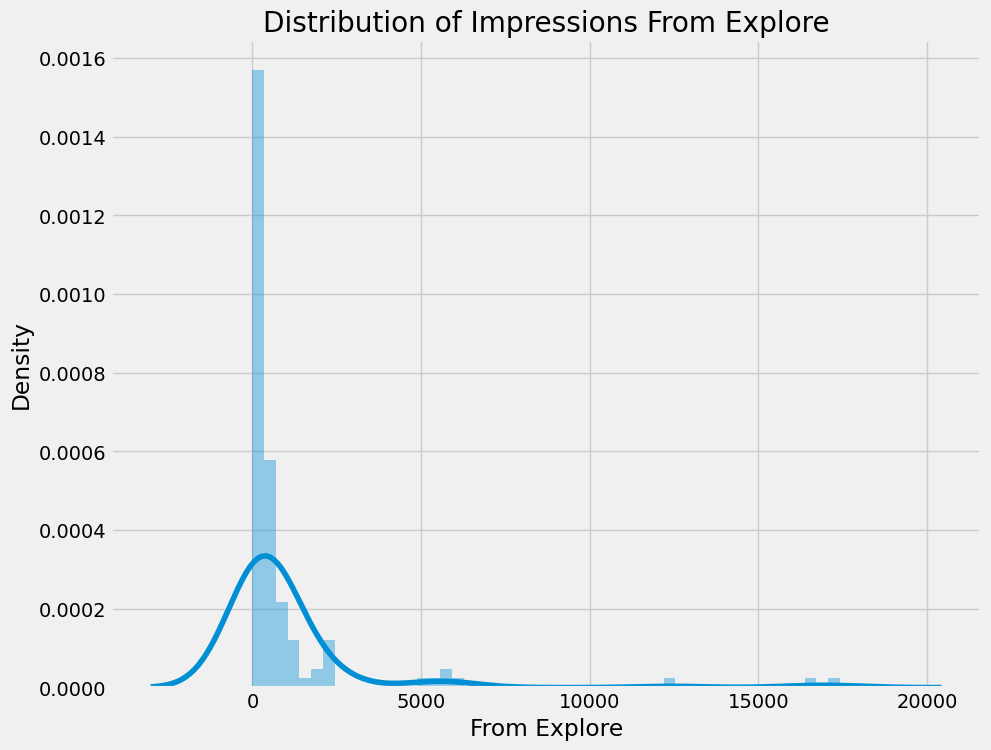

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

the explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

#  let’s have a look at the percentage of impressions I get from various sources on Instagram

In [10]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

So the above donut plot shows that  44.1 per cent of the reach is from my followers, 33.6 per cent is from hashtags, 19.2 per cent is from the explore section, and 3.05 per cent is from other sources.



# Analyzing Content

let’s analyze the content of my Instagram posts. The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content I post on Instagram

# Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts

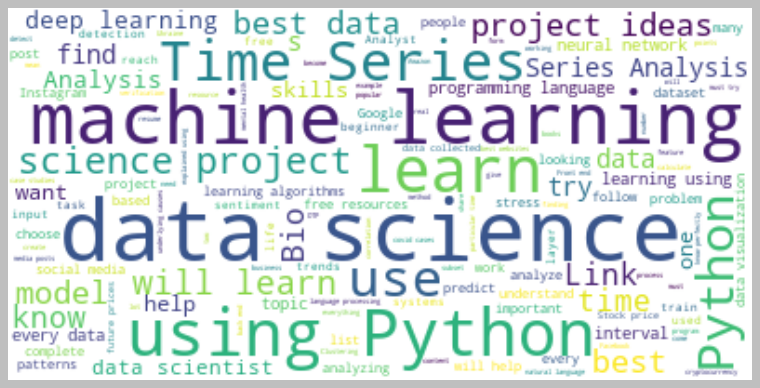

In [11]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:

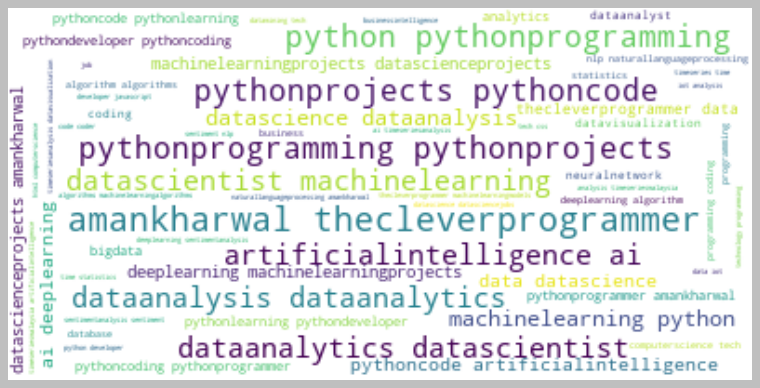

In [12]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing Relationships
analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

# Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts

In [13]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

# let’s see the relationship between the number of comments and the number of impressions on my Instagram posts

In [14]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

# Now let’s have a look at the relationship between the number of shares and the number of impressions

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

# let’s have a look at the relationship between the number of saves and the number of impressions

In [16]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

# let’s have a look at the correlation of all the columns with the Impressions column

In [18]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlations
correlation = numeric_data.corr()

# Display correlations with 'Impressions' in descending order
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


So we can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

# Analyzing Conversion Rate
In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100.

# let’s have a look at the conversation rate of my Instagram account

In [19]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate. 



# Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits

In [20]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

# Instagram Reach Prediction Model
Now in this section, I will train a machine learning model to predict the reach of an Instagram post.

#  Let’s split the data into training and test sets before training the model:

In [21]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

Now here’s is how we can train a machine learning model to predict the reach of an Instagram post using Python:



In [22]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.742864603532462

#  let’s predict the reach of an Instagram post by giving inputs to the machine learning model

In [23]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([8751.96253525])

# Summary
So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python. If a content creator wants to do well on Instagram in a long run, they have to look at the data of their Instagram reach. That is where the use of Data Science in social media comes in.